<a href="https://colab.research.google.com/github/Bibek257/Bibek257/blob/main/Score%20Pred%20Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


  Importing all necessary libraries and loading all the files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# Loading dataset
path='/content/drive/My Drive/datasets/Grade/'
f1=pd.read_csv(path+'student-por.csv',sep=';')
f2=pd.read_csv(path+'student-mat.csv',sep=';')


In [9]:
f1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
f2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df=pd.concat([f1,f2],axis=0,ignore_index=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
df.shape

(1044, 33)

**Data Preprocessing**

In [14]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [15]:
df.duplicated().sum()

np.int64(0)

Since we dont have any duplicate and null values, we are going to explore dataset more

In [35]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [19]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [20]:
df['address'].value_counts()

,count
address,
U,759
R,285


In [21]:
df['school'].value_counts()

,count
school,
GP,772
MS,272


In [25]:
df['famsize'].value_counts()

,count
famsize,
GT3,738
LE3,306


<Axes: xlabel='famsize'>

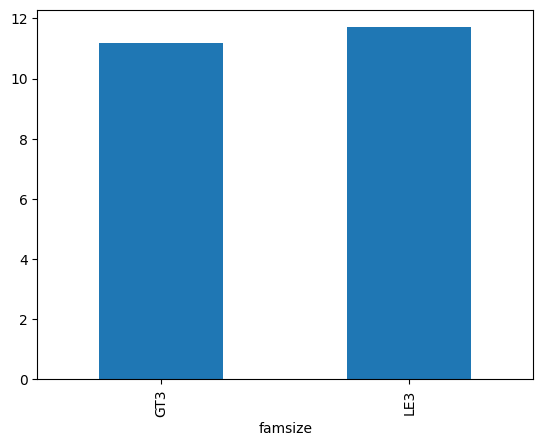

In [27]:
df.groupby(df['famsize'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='Pstatus'>

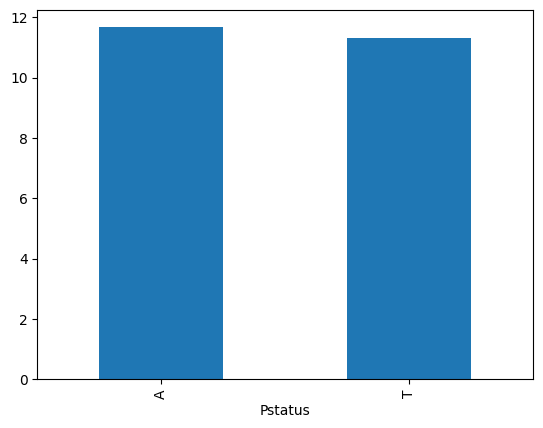

In [28]:
df.groupby(df['Pstatus'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='school'>

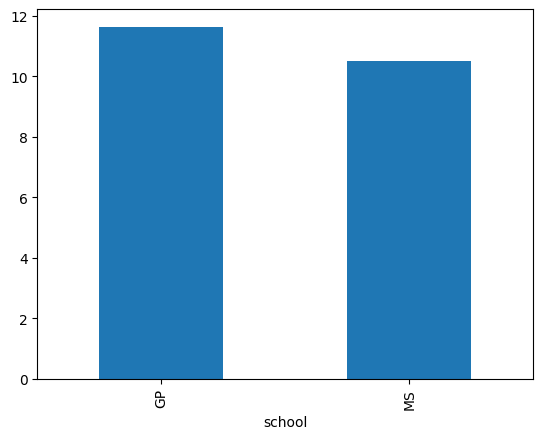

In [23]:
df.groupby(df['school'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='address'>

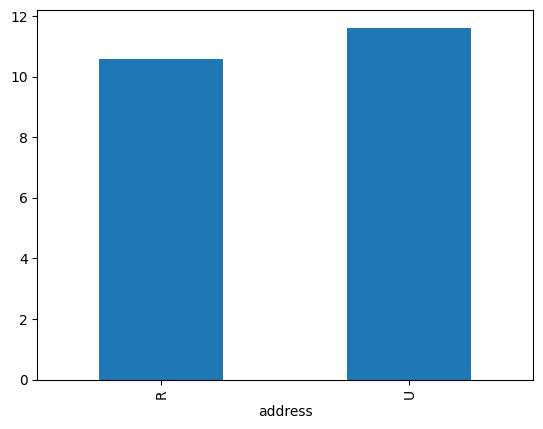

In [24]:
df.groupby(df['address'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='Medu'>

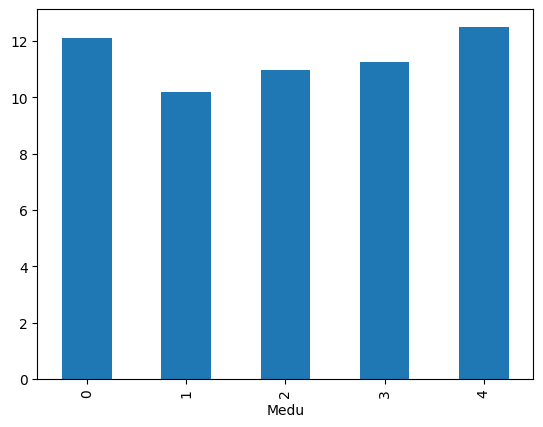

In [29]:
df.groupby(df['Medu'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='Fedu'>

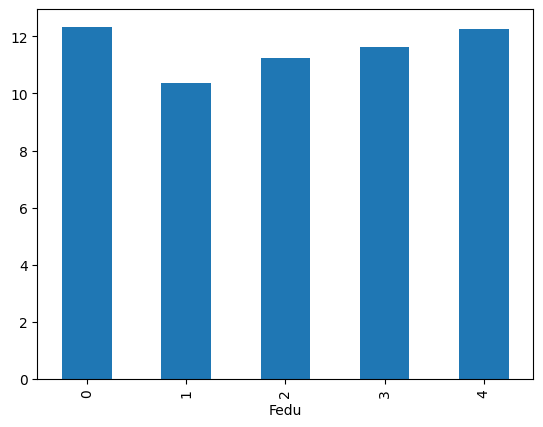

In [30]:
df.groupby(df['Fedu'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='Mjob'>

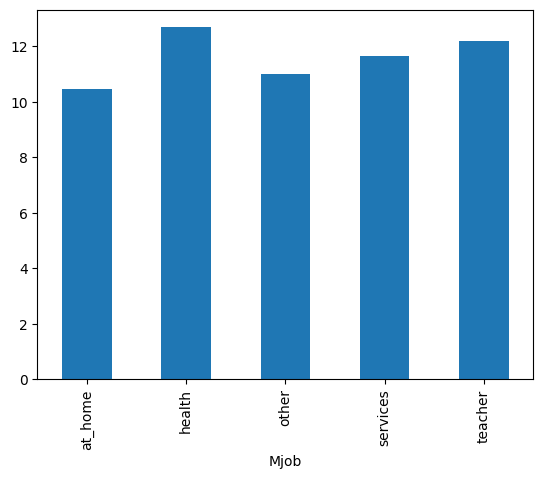

In [31]:
df.groupby(df['Mjob'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='Fjob'>

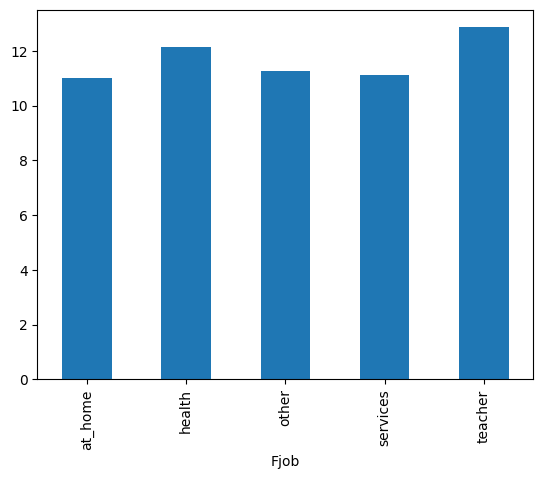

In [32]:
df.groupby(df['Fjob'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='reason'>

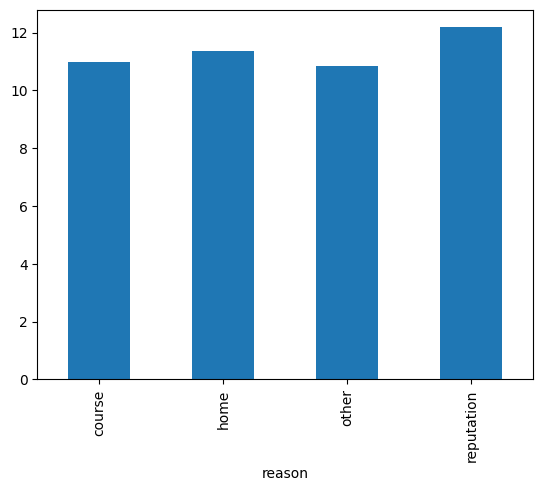

In [36]:
df.groupby(df['reason'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='guardian'>

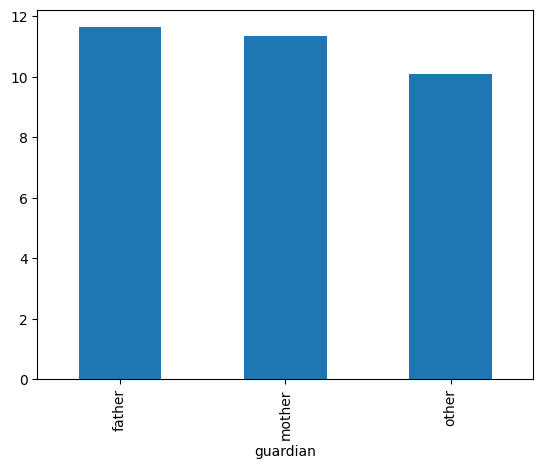

In [37]:
df.groupby(df['guardian'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='traveltime'>

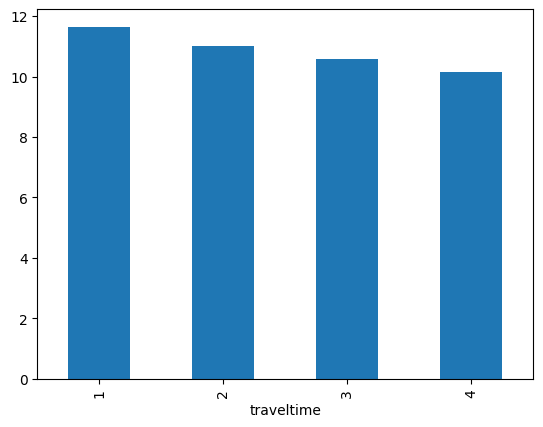

In [39]:
df.groupby(df['traveltime'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='studytime'>

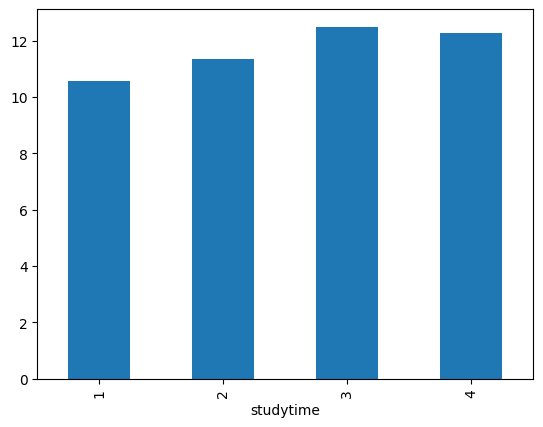

In [40]:
df.groupby(df['studytime'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='failures'>

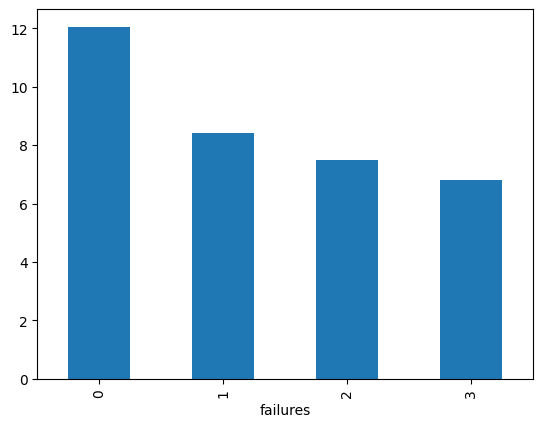

In [41]:
df.groupby(df['failures'])['G3'].mean().plot(kind='bar')

<Axes: xlabel='schoolsup'>

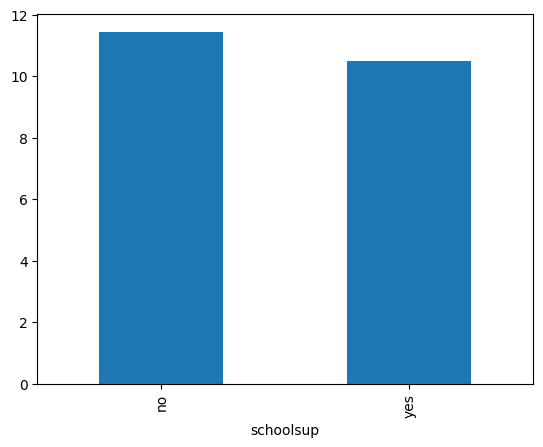

In [42]:
df.groupby(df['schoolsup'])['G3'].mean().plot(kind='bar')

<Axes: >

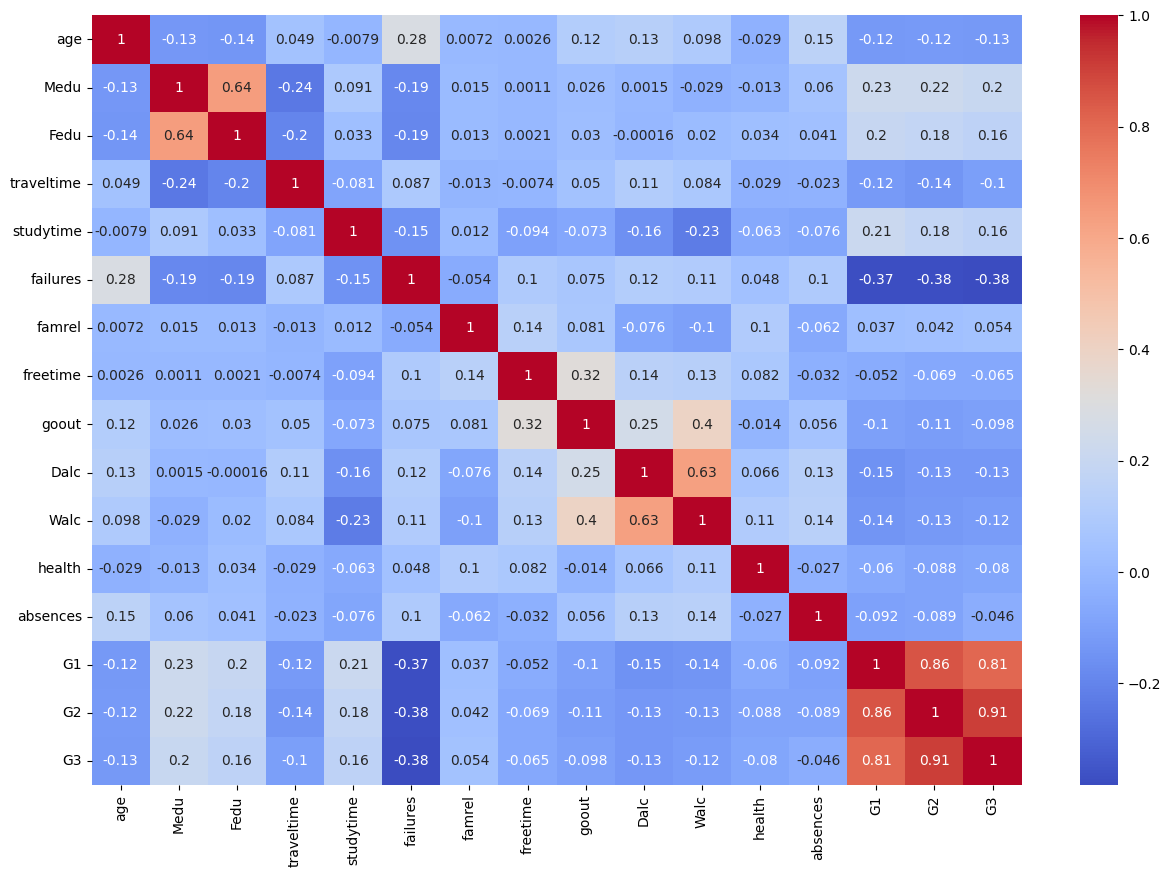

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [45]:
# Based on the correlation heatmap and initial visual analysis:
selected_columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2', 'G3']

selected_df=df[selected_columns]


Now seprating the dataset and also splitting it for model training

In [46]:
selected_df.head()

,Medu,Fedu,traveltime,studytime,failures,G1,G2,G3
0,4,4,2,2,0,0,11,11
1,1,1,1,2,0,9,11,11
2,1,1,1,2,0,12,13,12
3,4,2,1,3,0,14,14,14
4,3,3,1,2,0,11,13,13


In [47]:
x=selected_df.drop('G3',axis=1)
y=selected_df['G3']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [53]:
# Importing sk learn library and training model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)




LinearRegression()

In [54]:
y_pred=lr.predict(x_test)

In [55]:
r2_score(y_test,y_pred)

0.8457219372510032

In [56]:
mse=mean_squared_error(y_test,y_pred)
mse

2.2502678028150984

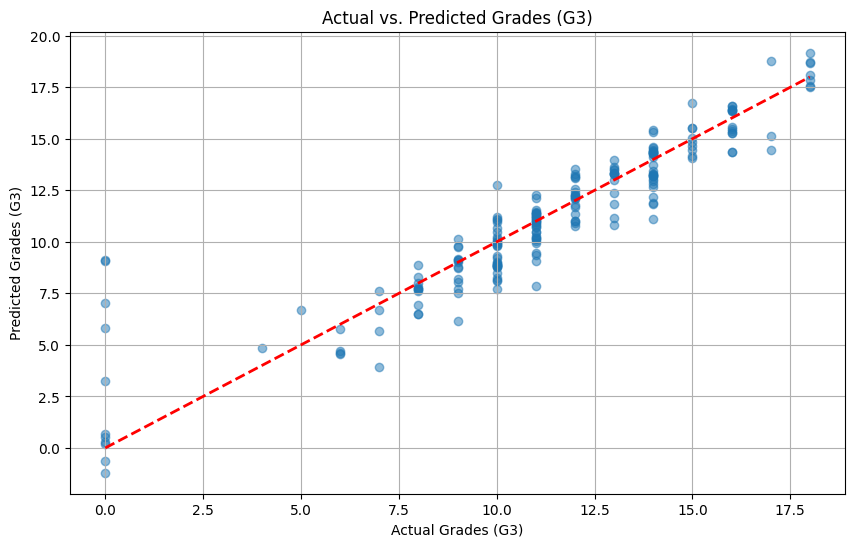

In [59]:
#predicted vs actual

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (G3)")
plt.grid(True)
plt.show()

In [60]:
# Training Decision tree with hyperparams
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
params={
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(dt,params,cv=5)
grid.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
4500 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [61]:
grid.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [62]:
y_pred=grid.predict(x_test)

In [64]:
mse=mean_squared_error(y_test,y_pred)
mse

3.6545036304309684

In [65]:
r2_score(y_test,y_pred)

0.7494477147534457

After looking at both model performance we are choosing Linear reg over decision tree

In [68]:
from joblib import dump
dump(lr,'grade_prediction.pkl')

['grade_prediction.pkl']